## Importing Libraries

In [2]:
import numpy as np   # for numerical computation
import pandas as pd  # for Data manipulation and analysis
import seaborn as sns # for plotting data
import matplotlib.pyplot as plt # for plotting data
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

### Reading Dataset

In [4]:
df=pd.read_csv('advertising.csv')

### Getting insights from data

In [6]:
df.columns

Index(['TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [7]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [8]:
df.tail()

,TV,Radio,Newspaper,Sales
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,13.4


In [9]:
df.describe()  # Statistical Information about data

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


In [10]:
df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [11]:
df.corr() # Relationship amoung the features

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


<Axes: >

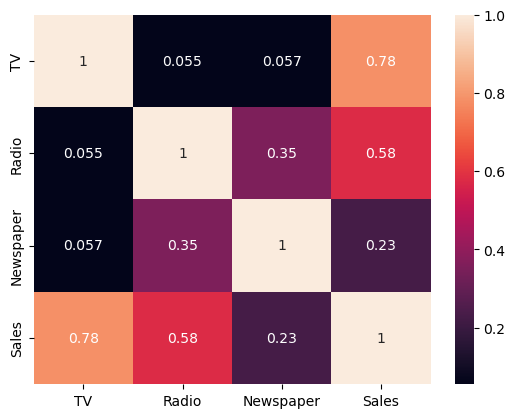

In [12]:
sns.heatmap(df.corr(),annot=True) # Visualizing the Correlation

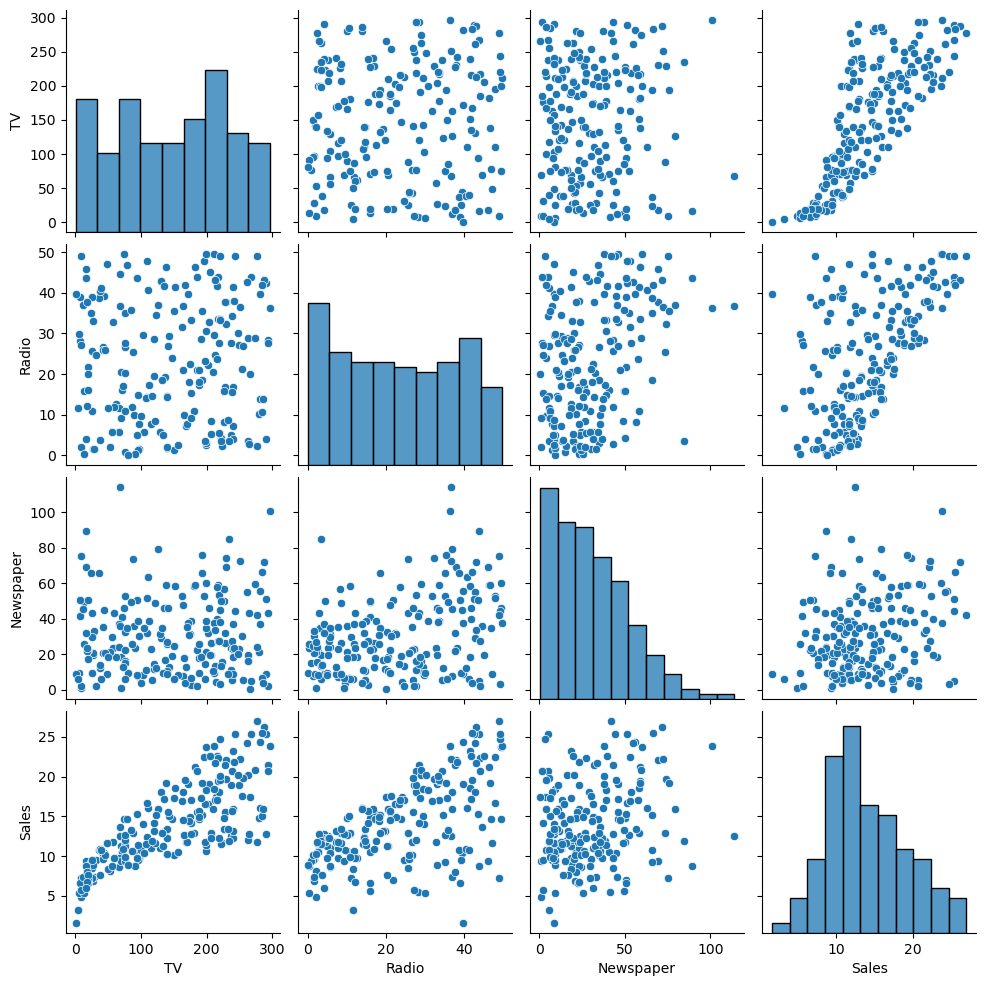

In [13]:
sns.pairplot(df)

### In the visualizations below, it is evident that TV shows a stronger correlation with sales (the target variable) compared to radio and newspaper.

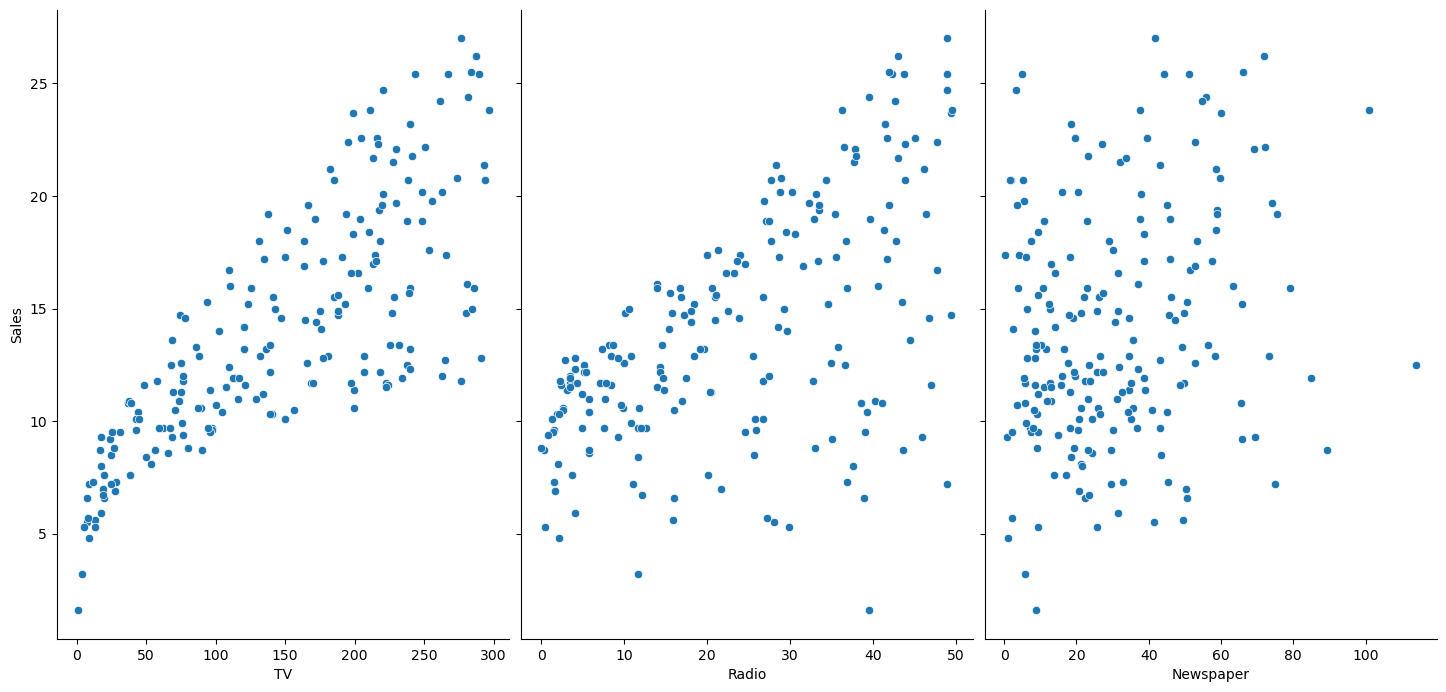

In [15]:
sns.pairplot(df,x_vars=['TV','Radio','Newspaper'],y_vars=['Sales'],height=7,aspect=0.7,kind='scatter')

In [16]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [17]:
X=df.iloc[:,0:3]

In [18]:
X[:5]

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4


In [19]:
y=df.iloc[:,-1]

In [20]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: Sales, dtype: float64

### Splitting the data into training and testing phases.
### Training size = 70% ,Testing size = 30%

In [22]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7,random_state=100)

In [23]:
X_train[:5]

,TV,Radio,Newspaper
74,213.4,24.6,13.1
3,151.5,41.3,58.5
185,205.0,45.1,19.6
26,142.9,29.3,12.6
90,134.3,4.9,9.3


In [24]:
y_train[:5]

74     17.0
3      18.5
185    22.6
26     15.0
90     11.2
Name: Sales, dtype: float64

In [25]:
X_train.shape

(140, 3)

In [26]:
y_train.shape

(140,)

In [27]:
X_train.ndim

2

### Importing the LinearRegression library to build the model and make predictions.

In [29]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

### Providing the training data to the model for learning.

In [31]:
lr.fit(X_train,y_train)

LinearRegression()

### y-intercept and slope

In [33]:
print(lr.intercept_) #c
print(lr.coef_) #m

2.6527896688794996
[0.0454256  0.18975773 0.00460308]


### Making the prediction on test dataset

In [35]:
y_pred=lr.predict(X_test)

### Evaluate the performance of the model and calculate the error

In [37]:
from sklearn.metrics import mean_squared_error , r2_score
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)

In [38]:
print(mse)
print(r2)

1.8506819941636943
0.9058622107532247


In [39]:
r2*100  #Accuracy

90.58622107532247

In [40]:
n = X_test.shape[0] 
p = X_test.shape[1] 
adj_r2 = 1 - (1 - r2) * (n - 1) / (n - p - 1)

print("Adjusted R-squared:", adj_r2*100)


Adjusted R-squared: 90.08191149007189


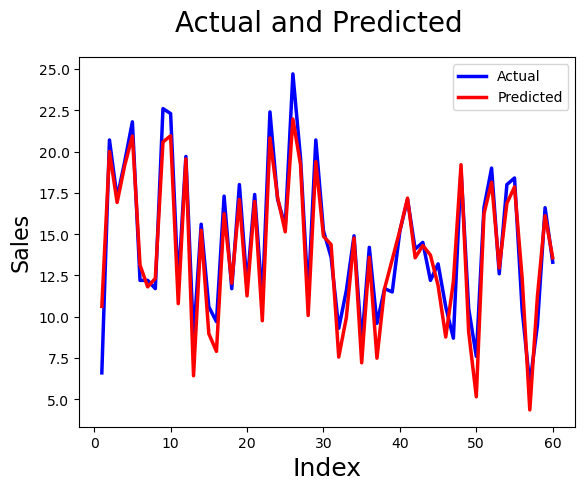

In [92]:
#Actual vs Predicted having all 3 features
c = [i for i in range(1,61,1)]
fig = plt.figure()
plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-",label="Actual")
plt.plot(c,y_pred, color="red",  linewidth=2.5, linestyle="-",label="Predicted")
fig.suptitle('Actual and Predicted', fontsize=20)              # Plot heading 
plt.xlabel('Index', fontsize=18)                               # X-label
plt.ylabel('Sales', fontsize=16)                               # Y-label
plt.legend()
plt.show()